In [24]:
import matplotlib.pyplot as plt
import cv2
import os
from default_cnn_model import DefaultModel
import numpy as np
import warnings
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import tensorflow as tf
warnings.filterwarnings("ignore", category=DeprecationWarning) 
tf.random.set_seed(221)
np.random.seed(221)
tf.get_logger().setLevel('INFO')

In [25]:
import numpy as np
def getImageResized(r, file):
  filepath = os.path.join(r, file)
  img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_CUBIC)
  return img

def plotFirstImages(files, action):
  print("Exemplo de padrões de compra da ação ", action)
  plt.figure(0)
  plt.subplot(221)
  plt.imshow(files[0], cmap=plt.get_cmap('gray'))
  plt.subplot(222)
  plt.imshow(files[1], cmap=plt.get_cmap('gray'))
  plt.subplot(223)
  plt.imshow(files[2], cmap=plt.get_cmap('gray'))
  plt.subplot(224)
  plt.imshow(files[3], cmap=plt.get_cmap('gray'))
  plt.show()

def parseImagesToArray(path):
  aux_arr = []
  for r, d, f in os.walk(path):
    for file in f:
      aux_arr.append(getImageResized(r,file))
  return aux_arr

def reshape_data(data):
  img_rows, img_cols = 28, 28
  data = data.reshape(data.shape[0], img_rows, img_cols, 1)
  data = data / 255
  return data

Shape dos dados de treino antes do resize  (4735, 28, 28)
Shape dos dados de treino depois do resize e normalização (4735, 28, 28, 1)
Exemplo de padrões de compra da ação  BBAS3.SA


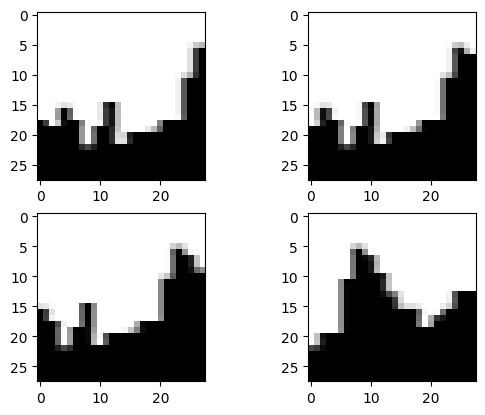

Treinando modelo para a ação: BBAS3.SA


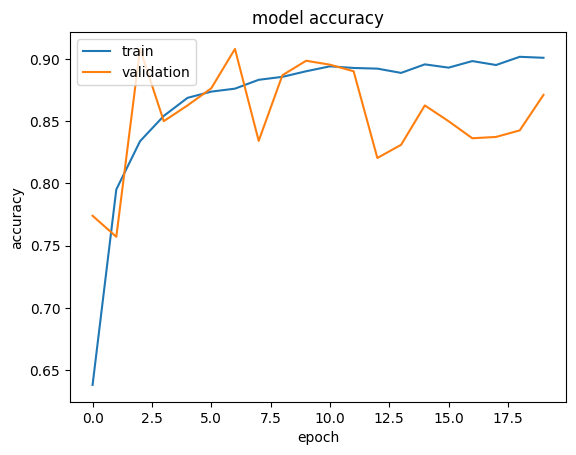

(TESTE)Erro da CNN: 12.57%
(TESTE)Acurária da CNN: 87.43%
Matriz de confusão


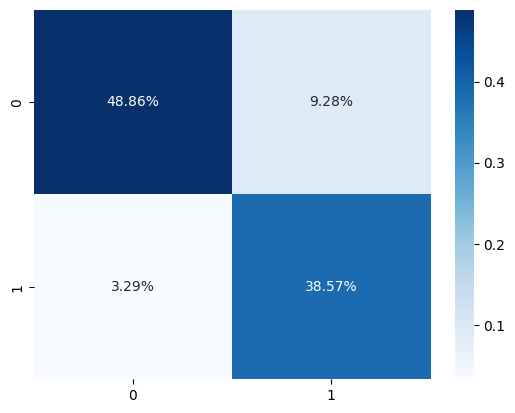

Precision, recall e f1-score
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       689
         1.0       0.81      0.92      0.86       496

    accuracy                           0.87      1185
   macro avg       0.87      0.88      0.87      1185
weighted avg       0.88      0.87      0.88      1185



--------------------------------------------#################------------------------------------------------------




c:\Users\Verdant\Documents\MBA - FIAP\Deep learning\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Shape dos dados de treino antes do resize  (4743, 28, 28)
Shape dos dados de treino depois do resize e normalização (4743, 28, 28, 1)
Exemplo de padrões de compra da ação  CSNA3.SA


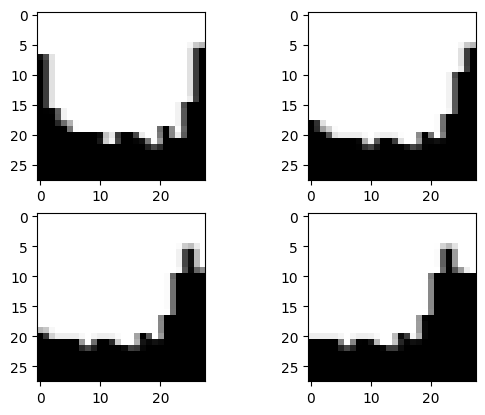

Treinando modelo para a ação: CSNA3.SA


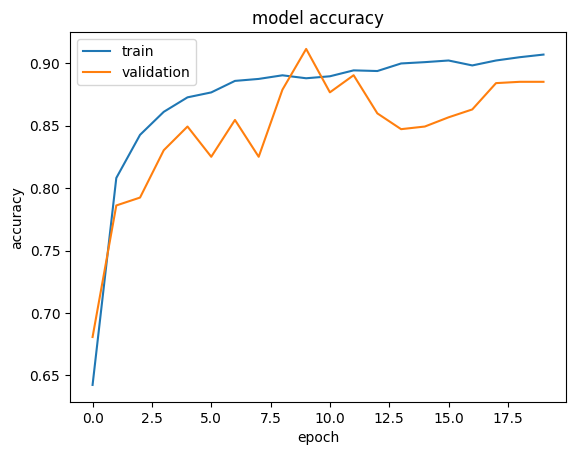

(TESTE)Erro da CNN: 11.05%
(TESTE)Acurária da CNN: 88.95%
Matriz de confusão


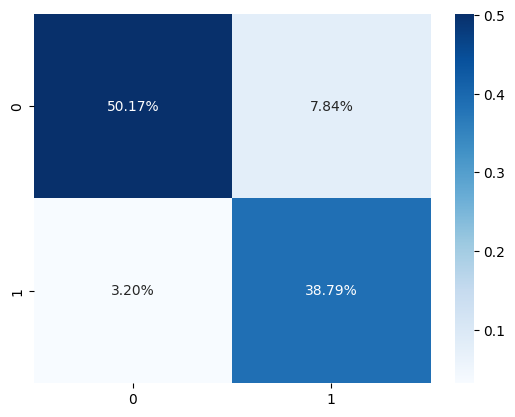

Precision, recall e f1-score
              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       688
         1.0       0.83      0.92      0.88       498

    accuracy                           0.89      1186
   macro avg       0.89      0.89      0.89      1186
weighted avg       0.89      0.89      0.89      1186



--------------------------------------------#################------------------------------------------------------




c:\Users\Verdant\Documents\MBA - FIAP\Deep learning\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Shape dos dados de treino antes do resize  (4808, 28, 28)
Shape dos dados de treino depois do resize e normalização (4808, 28, 28, 1)
Exemplo de padrões de compra da ação  PETR4.SA


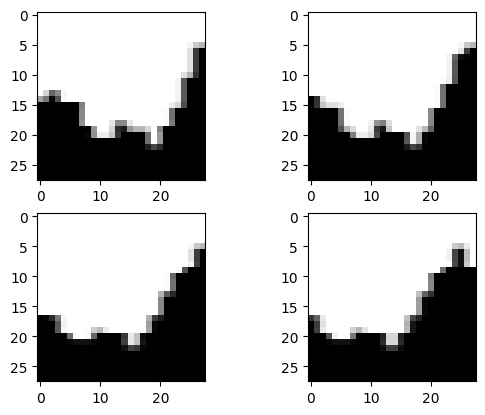

Treinando modelo para a ação: PETR4.SA


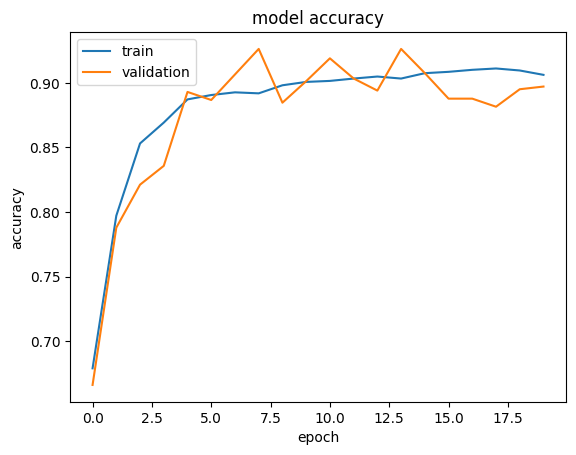

(TESTE)Erro da CNN: 13.63%
(TESTE)Acurária da CNN: 86.37%
Matriz de confusão


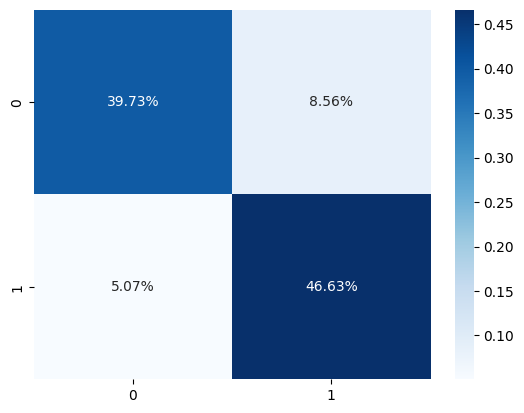

Precision, recall e f1-score
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85       581
         1.0       0.84      0.90      0.87       622

    accuracy                           0.86      1203
   macro avg       0.87      0.86      0.86      1203
weighted avg       0.87      0.86      0.86      1203



--------------------------------------------#################------------------------------------------------------




c:\Users\Verdant\Documents\MBA - FIAP\Deep learning\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Shape dos dados de treino antes do resize  (4808, 28, 28)
Shape dos dados de treino depois do resize e normalização (4808, 28, 28, 1)
Exemplo de padrões de compra da ação  VALE3.SA


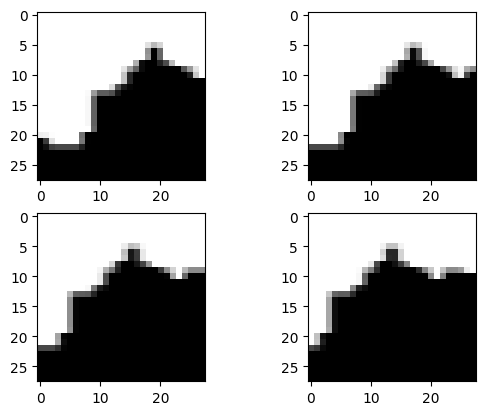

Treinando modelo para a ação: VALE3.SA


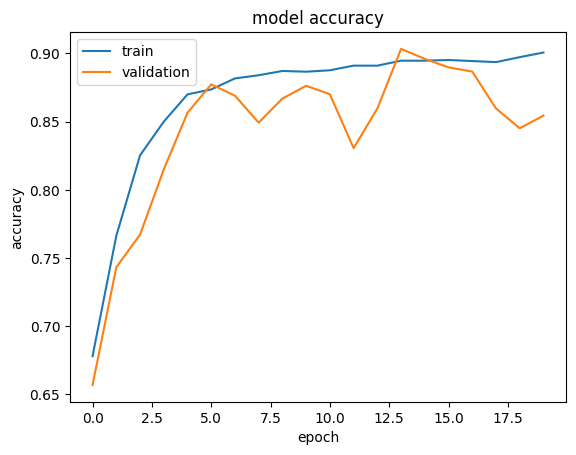

(TESTE)Erro da CNN: 11.22%
(TESTE)Acurária da CNN: 88.78%
Matriz de confusão


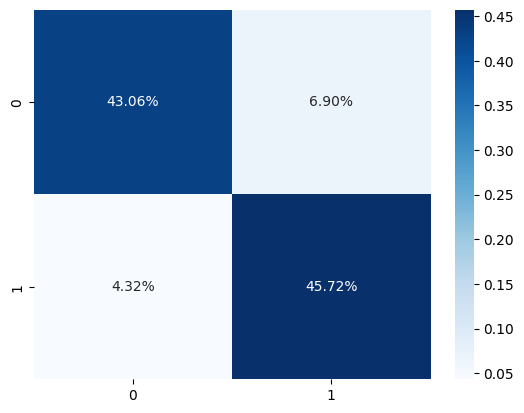

Precision, recall e f1-score
              precision    recall  f1-score   support

         0.0       0.91      0.86      0.88       601
         1.0       0.87      0.91      0.89       602

    accuracy                           0.89      1203
   macro avg       0.89      0.89      0.89      1203
weighted avg       0.89      0.89      0.89      1203



--------------------------------------------#################------------------------------------------------------




c:\Users\Verdant\Documents\MBA - FIAP\Deep learning\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
actions = ["BBAS3.SA", "CSNA3.SA", "PETR4.SA", "VALE3.SA"]

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

val_accuracies = []
train_accuracies = []

for action in actions:
  training_buy_path = "./" + action + "./imagens/treino/comprar"
  training_sell_path = "./" + action + "./imagens/treino/vender"
  test_buy_path = "./" + action + "./imagens/teste/comprar"
  test_sell_path = "./" + action + "./imagens/teste/vender"


  train_buy_actions = parseImagesToArray(training_buy_path)
  train_sell_actions = parseImagesToArray(training_sell_path)

  x_train = np.concatenate((train_buy_actions, train_sell_actions), axis=0)
  print("Shape dos dados de treino antes do resize ", x_train.shape)
  x_train = reshape_data(x_train)
  print("Shape dos dados de treino depois do resize e normalização", x_train.shape)

  y_train = np.concatenate((np.ones(len(train_buy_actions)), np.zeros(len(train_sell_actions))), axis=0)

  plotFirstImages(train_buy_actions, action)

  model = DefaultModel().build()
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  print("Treinando modelo para a ação:", action)
  history = model.fit(x_train, y_train, validation_split = 0.2, epochs=20, batch_size=500, verbose=0)

  plt.figure(1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  test_buy_actions = []
  test_sell_actions = []

  for r, d, f in os.walk(test_buy_path):
    for file in f:
      test_buy_actions.append(getImageResized(r,file))

  for r, d, f in os.walk(test_sell_path):
    for file in f:
      test_sell_actions.append(getImageResized(r,file))

  x_test = np.concatenate((test_buy_actions, test_sell_actions), axis=0)
  y_test = np.concatenate((np.ones(len(test_buy_actions)), np.zeros(len(test_sell_actions))), axis=0)

  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  x_test = x_test / 255

  train_scores = model.evaluate(x_train, y_train, verbose=0)
  scores = model.evaluate(x_test, y_test, verbose=0)
  print("(TESTE)Erro da CNN: %.2f%%" % (100-scores[1]*100))
  print("(TESTE)Acurária da CNN: %.2f%%" % (scores[1]*100))

  val_accuracies.append(scores[1])
  train_accuracies.append(train_scores[1])

  print("Matriz de confusão")
  y_pred = model.predict(x_test, verbose = 0)
  y_pred = np.array(np.round(y_pred))
  y_test = np.array(y_test)
  cf_matrix = confusion_matrix(y_test, y_pred)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
  plt.show()

  print("Precision, recall e f1-score")
  print(classification_report(y_test, y_pred)) 

  print("\n")
  print("--------------------------------------------#################------------------------------------------------------")
  print("\n")
  model.save("./models/cnns/" + action + '_model.hdf5', )


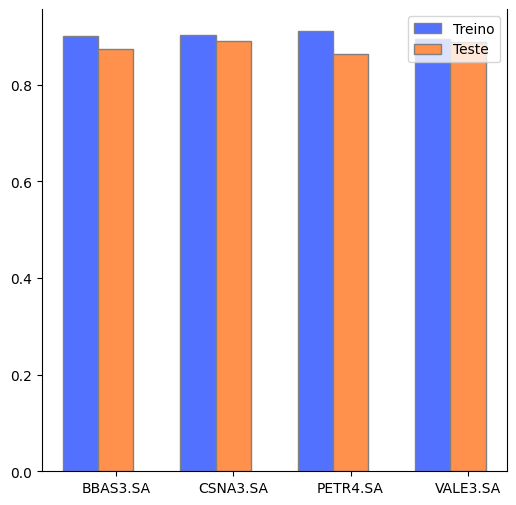

In [27]:
barWidth = 0.30
fig, ax= plt.subplots(figsize =(6,6)) 

br1 = np.arange(4) 
br2 = [x + barWidth for x in br1] 
 
ax.spines['top'].set_visible(False)

# Make the plot
plt.bar(br1, train_accuracies, color ='#5271FF', width = barWidth, 
        edgecolor ='grey', label ='Treino') 
plt.bar(br2, val_accuracies, color ='#FF914D', width = barWidth, 
        edgecolor ='grey', label ='Teste') 

plt.xticks([r + barWidth for r in range(4)], ["BBAS3.SA","CSNA3.SA","PETR4.SA","VALE3.SA"])
# plt.savefig('chart.png')
 
plt.legend()
plt.show() 
